In [1]:
from __future__ import division, print_function
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('C:/Users/Len/Downloads/DATA-ANALYSYS_2-master (1)/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv', delimiter=',')
data.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [3]:
mean = data.mean()
data = data.fillna(mean)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


In [4]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11].astype('float64')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
trees_grid = [i for i in range(1, 302, 10)]

    ntree     score
0     1.0  0.714564
1    11.0  0.764512
2    21.0  0.773811
3    31.0  0.776211
4    41.0  0.776511
5    51.0  0.779361
6    61.0  0.781011
7    71.0  0.779811
8    81.0  0.780561
9    91.0  0.781311
10  101.0  0.782061
11  111.0  0.781911
12  121.0  0.781311
13  131.0  0.781161
14  141.0  0.781011
15  151.0  0.780411
16  161.0  0.781461
17  171.0  0.782211
18  181.0  0.781161
19  191.0  0.780861
20  201.0  0.780561
21  211.0  0.779961
22  221.0  0.781611
23  231.0  0.780261
24  241.0  0.780861
25  251.0  0.779661
26  261.0  0.779661
27  271.0  0.780411
28  281.0  0.780411
29  291.0  0.779511
30  301.0  0.779361


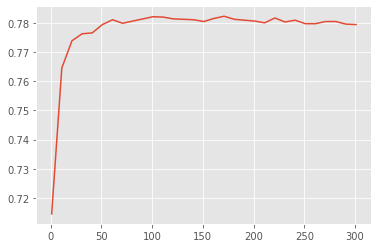

In [10]:
temp_test_acc = pd.DataFrame(columns=['ntree', 'score'])
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'ntree': ntrees, 'score': rfc.score(X_test, y_test)}, ignore_index=True)
print(temp_test_acc)
plt.plot(temp_test_acc['ntree'], temp_test_acc['score'])

Заметим, что, начиная с числа деревьев, равного 91, точность держится около отметки - 0.781, из чего приходим к выводу, что оптимальное число деревьев - 91.

    sample     score
0      1.0  0.782061
1      2.0  0.788061
2      3.0  0.792260
3      4.0  0.794060
4      5.0  0.791960
5      6.0  0.795410
6      7.0  0.795410
7      8.0  0.793760
8      9.0  0.793910
9     10.0  0.794810
10    11.0  0.796160
11    12.0  0.794360
12    13.0  0.796010
13    14.0  0.796460
14    15.0  0.793010
15    16.0  0.795410
16    17.0  0.795710
17    18.0  0.796610
18    19.0  0.793610
19    20.0  0.795110
20    21.0  0.795560
21    22.0  0.794060
22    23.0  0.796160
23    24.0  0.796760
24    25.0  0.796310
25    26.0  0.794960
26    27.0  0.796910
27    28.0  0.797810
28    29.0  0.797510


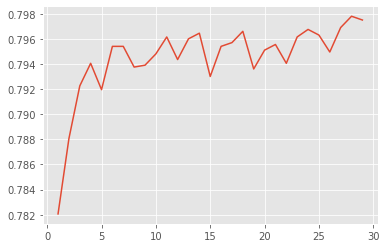

In [14]:
arr = [i for i in range(1, 30)]

temp_test_acc = pd.DataFrame(columns=['sample', 'score'])
for min_samples_leaf in arr:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'sample': min_samples_leaf, 'score': rfc.score(X_test, y_test)}, ignore_index=True)
    
plt.plot(temp_test_acc['sample'], temp_test_acc['score'])
print(temp_test_acc)

Видно, что с увеличением числа минимального количества выборок, точность повышается.